In [1]:
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
import seaborn as sb

import platform

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~')

In [3]:
df=pd.read_csv("../data/고객db_전처리.csv",index_col=0)

In [4]:
df.head(2)

,이름,생년월일,현재 나이,연령대,성별,휴대폰 번호,이메일,고객 구분,아이디,가입일,...,최근 구매 시점,최근 구매 요일,마지막 구매 이후 경과 기간,최근 구매 당시 나이,최근 거래 금액,선호 거래 방식,선호 구매 경로,차량 구매 횟수,신차 구매 지수,브랜드 충성도 지수
연번,,,,,,,,,,,,,,,,,,,,,
1,강주온,2002-03-04,23,20대 중반,남,010-6502-8753,janisi@himedia.co.kr,법인,14798,2023-04-01,...,2분기,평일,350,22,33820000,신용카드,오프라인,1,0.002,0.135
2,김경수,1983-01-02,42,40대 초반,남,010-1111-2222,kimkyoungsoo31@himedia.co.kr,법인,kyoungsoo031,2025-02-09,...,1분기,평일,38,42,89930000,신용카드,오프라인,5,0.508,0.037


In [29]:
df[df["최근 구매 당시 나이"]<20]

,이름,생년월일,현재 나이,연령대,성별,휴대폰 번호,이메일,고객 구분,아이디,가입일,...,최근 구매 시점,최근 구매 요일,마지막 구매 이후 경과 기간,최근 구매 당시 나이,최근 거래 금액,선호 거래 방식,선호 구매 경로,차량 구매 횟수,신차 구매 지수,브랜드 충성도 지수
연번,,,,,,,,,,,,,,,,,,,,,
58,서은정,2005-03-04,20,20대 초반,여,032-170-6440,ugim@daum.net,개인,seoyeon90,2024-07-07,...,3분기,주말,201,19,49330000,계좌이체,온라인,5,0.052,0.241
71,이정자,2004-03-16,21,20대 초반,여,010-2415-1251,hgim@daum.net,개인,myeongsug84,2024-02-01,...,3분기,주말,572,19,40200000,계좌이체,온라인,5,0.019,0.388


In [30]:
df["최근 구매 제품"].nunique()

14

In [31]:
df["차량 유형"].nunique()

3

In [32]:
df["차량 사이즈"].nunique()

5

In [33]:
# (성별/구매 당시 연령별) (차량 사이즈/차량 유형) 분석
# 	→ ex) 여성 20대 30대 40대 의 차량 우선도

In [9]:
category_df=df[["성별","최근 구매 당시 나이","최근 구매 제품","차량 사이즈","차량 유형","최근 거래 금액"]]

In [10]:
# 구매 당시 나이 연령대 구하기
category_df["연령대"] = (df["최근 구매 당시 나이"] // 10 * 10).astype(str) + "대"

/var/folders/6y/dhcn_x315mxfr5mf45wd9ctw0000gp/T/ipykernel_51001/634928100.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  category_df["연령대"] = (df["최근 구매 당시 나이"] // 10 * 10).astype(str) + "대"


In [14]:
# 필요 없는 컬럼 삭제
category_df=category_df.drop(columns=["최근 구매 당시 나이"])

In [54]:
type_df=category_df.groupby(["성별","연령대","차량 유형"])[["최근 거래 금액"]].count().reset_index()

In [61]:
type_df=type_df.rename(columns={"최근 거래 금액":"판매량"})

In [62]:
type_df.head(2)

,성별,연령대,차량 유형,판매량
0,남,20대,SUV,12
1,남,20대,세단,18


In [63]:
type_man=type_df[type_df["성별"]=="남"]

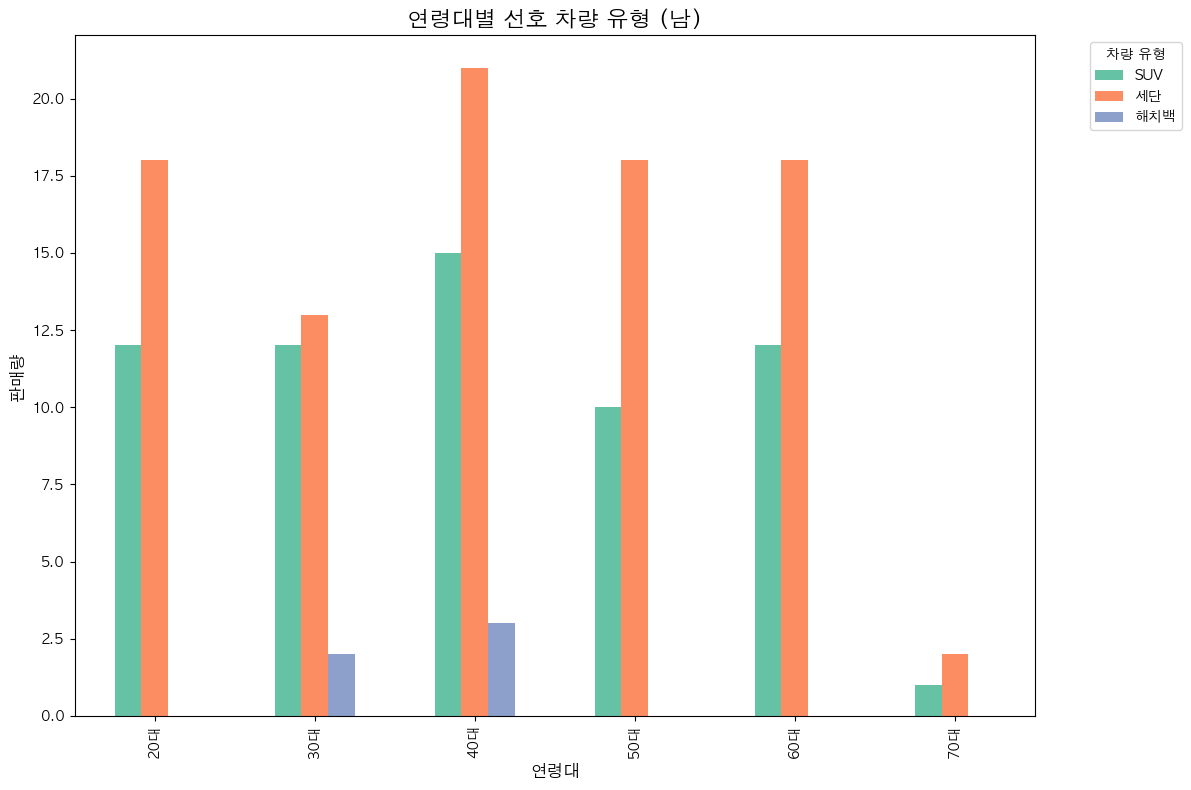

In [68]:
# 연령대와 제품별 판매량 합산
df_pivot = type_man.pivot_table(index='연령대', columns='차량 유형', values='판매량', aggfunc='sum', fill_value=0)

# 색상 설정 (Seaborn 팔레트 사용)
colors = sb.color_palette("Set2", n_colors=len(df_pivot.columns))

# 스택형 막대 그래프 그리기 (색상 적용)
ax = df_pivot.plot(kind='bar', figsize=(12, 8), color=colors)  # color=colors 추가

# 그래프 제목과 레이블 설정
ax.set_title('연령대별 선호 차량 유형 (남)', fontsize=16)
ax.set_xlabel('연령대', fontsize=12)
ax.set_ylabel('판매량', fontsize=12)

# 범례 설정
plt.legend(title='차량 유형', bbox_to_anchor=(1.05, 1), loc='upper left')

# 그래프 표시
plt.tight_layout()
plt.show()

In [ ]:
# 전반적으로 세단 선호도가 두드러짐
# 30대가 되면서 세단 선호도가 약간 주춤하는 경향
# 이유가 뭘까?

# SUV 선호도는 비교적 고른 분포를 보임
# 이유가 뭘까?

In [69]:
type_female=type_df[type_df["성별"]=="여"]

In [71]:
type_female

,성별,연령대,차량 유형,판매량
14,여,10대,세단,2
15,여,20대,SUV,13
16,여,20대,세단,15
17,여,20대,해치백,2
18,여,30대,SUV,7
19,여,30대,세단,8
20,여,40대,SUV,15
21,여,40대,세단,16
22,여,40대,해치백,1
23,여,50대,SUV,12


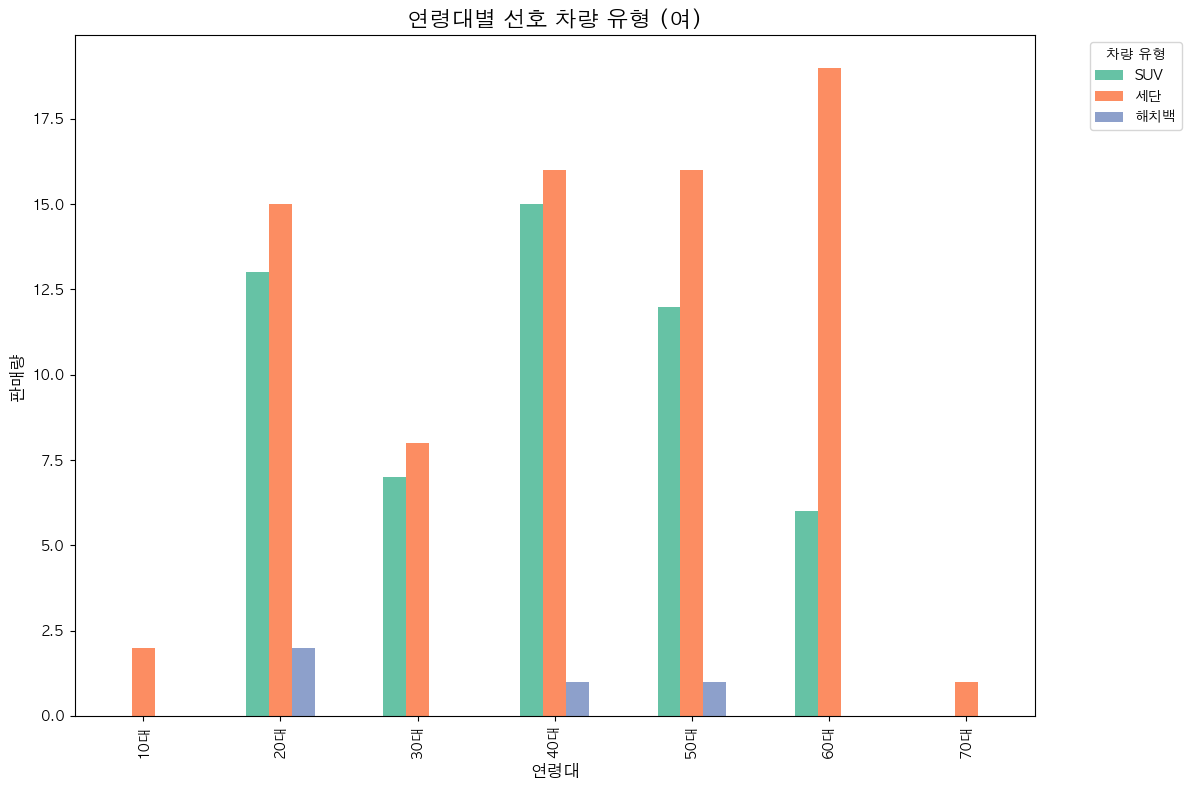

In [72]:
# 연령대와 제품별 판매량 합산
df_pivot = type_female.pivot_table(index='연령대', columns='차량 유형', values='판매량', aggfunc='sum', fill_value=0)

# 색상 설정 (Seaborn 팔레트 사용)
colors = sb.color_palette("Set2", n_colors=len(df_pivot.columns))

# 스택형 막대 그래프 그리기 (색상 적용)
ax = df_pivot.plot(kind='bar', figsize=(12, 8), color=colors)  # color=colors 추가

# 그래프 제목과 레이블 설정
ax.set_title('연령대별 선호 차량 유형 (여)', fontsize=16)
ax.set_xlabel('연령대', fontsize=12)
ax.set_ylabel('판매량', fontsize=12)

# 범례 설정
plt.legend(title='차량 유형', bbox_to_anchor=(1.05, 1), loc='upper left')

# 그래프 표시
plt.tight_layout()
plt.show()

In [ ]:
# 남성과 비슷하게 전반적으로 세단 선호도가 두드러짐

# 60대가 되면서 세단 선호도가 매우 높아지는 양상
# 이유가 뭘까?

# SUV 역시 세단과 비슷한 선호도를 보임
# 이유가 뭘까?

# 30대에 차량 판매량이 급감
# 이유가 뭘까?

# 남성과 다르게 20대의 차량 구매량이 적음
# 이유가 뭘까?

In [ ]:
# 성별/나이별 차량 사이즈 분석

In [15]:
category_df.head(2)

,성별,최근 구매 제품,차량 사이즈,차량 유형,최근 거래 금액,연령대
연번,,,,,,
1,남,Avante (CN7 N),준중형,세단,33820000,20대
2,남,G80 (RG3),대형,세단,89930000,40대


In [17]:
# 성별/ 연령대/ 차량 사이즈/ 거래금액
size_df=category_df[["성별","연령대","차량 사이즈","최근 거래 금액"]]

In [19]:
size_df.head(2)

,성별,연령대,차량 사이즈,최근 거래 금액
연번,,,,
1,남,20대,준중형,33820000
2,남,40대,대형,89930000


In [41]:
# 남성과 나이, 차량 사이즈로 그룹화 하고 거래 금액으로 판매량 컬럼 만들기
size_df=size_df.groupby(["성별","연령대","차량 사이즈"])[["최근 거래 금액"]].count().reset_index()

In [42]:
# 컬럼 이름 변경
size_df=size_df.rename(columns={"최근 거래 금액":"판매량"})

In [43]:
# 남성만 가져오기
size_man=size_df[size_df["성별"]=="남"]

In [44]:
size_man.head(2)

,성별,연령대,차량 사이즈,판매량
0,남,20대,대형,6
1,남,20대,준대형,2


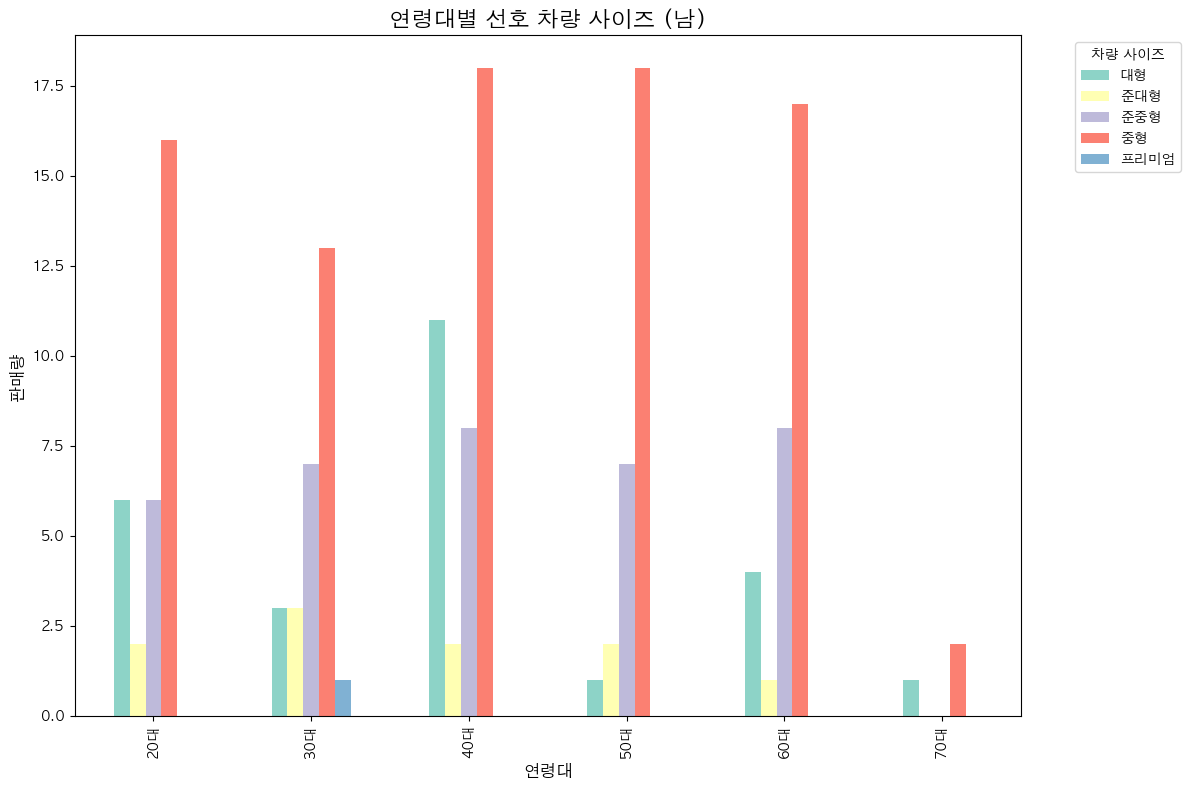

In [ ]:
# 연령대와 제품별 판매량 합산
df_pivot = size_man.pivot_table(index='연령대', columns='차량 사이즈', values='판매량', aggfunc='sum', fill_value=0)

# 색상 설정 (Seaborn 팔레트 사용)
colors = sb.color_palette("Set3", n_colors=len(df_pivot.columns))

# 스택형 막대 그래프 그리기
ax = df_pivot.plot(kind='bar', figsize=(12, 8), color=colors)

# 그래프 제목과 레이블 설정
ax.set_title('연령대별 선호 차량 사이즈 (남)', fontsize=16)
ax.set_xlabel('연령대', fontsize=12)
ax.set_ylabel('판매량', fontsize=12)

# 범례 설정
plt.legend(title='차량 사이즈', bbox_to_anchor=(1.05, 1), loc='upper left')

# 그래프 표시
plt.tight_layout()
plt.show()

In [74]:
# 여성만 가져오기
size_female=size_df[size_df["성별"]=="여"]

In [75]:
size_female

,성별,연령대,차량 사이즈,판매량
23,여,10대,준중형,1
24,여,10대,중형,1
25,여,20대,대형,1
26,여,20대,준중형,9
27,여,20대,중형,20
28,여,30대,대형,2
29,여,30대,준중형,3
30,여,30대,중형,10
31,여,40대,대형,5
32,여,40대,준중형,5


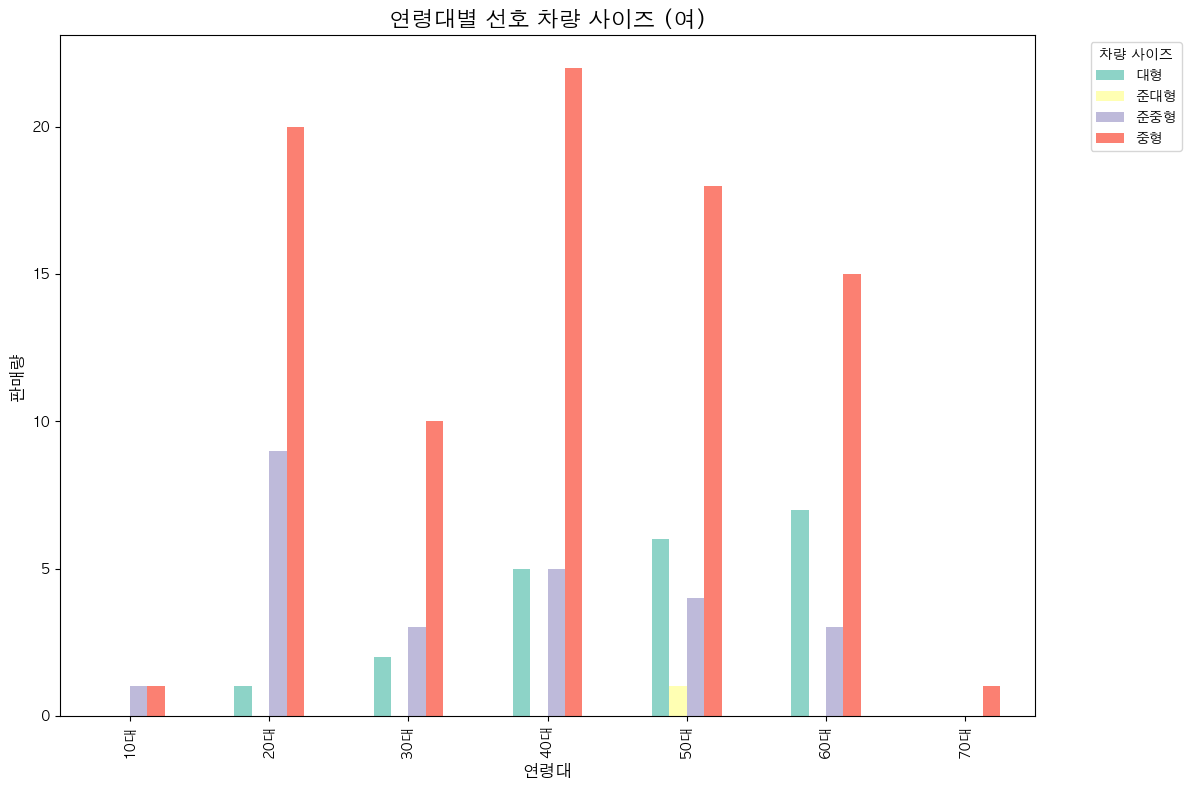

In [76]:
# 연령대와 제품별 판매량 합산
df_pivot = size_female.pivot_table(index='연령대', columns='차량 사이즈', values='판매량', aggfunc='sum', fill_value=0)

# 색상 설정 (Seaborn 팔레트 사용)
colors = sb.color_palette("Set3", n_colors=len(df_pivot.columns))

# 스택형 막대 그래프 그리기
ax = df_pivot.plot(kind='bar', figsize=(12, 8), color=colors)

# 그래프 제목과 레이블 설정
ax.set_title('연령대별 선호 차량 사이즈 (여)', fontsize=16)
ax.set_xlabel('연령대', fontsize=12)
ax.set_ylabel('판매량', fontsize=12)

# 범례 설정
plt.legend(title='차량 사이즈', bbox_to_anchor=(1.05, 1), loc='upper left')

# 그래프 표시
plt.tight_layout()
plt.show()